In [1]:
#线性回归的实现
#20201212 Dalian

In [2]:
import torch
import numpy as np
import random
from matplotlib import pyplot as plt

In [3]:
#制造数据
num_inputs=2
num_examples=1000
true_w=[12.21,1.08]
true_b=9.27
features=torch.randn(num_examples,num_inputs,dtype=torch.float32) #基于标准正态产生随机数
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
noise=torch.normal(mean=torch.zeros_like(labels),std=0.1+torch.zeros_like(labels))
#noise=np.random.normal(0,0.1,size=labels.size())
labels+=noise

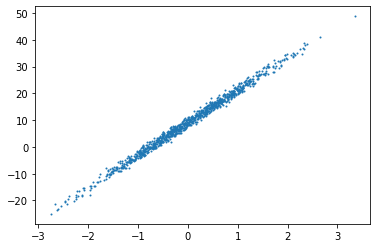

In [4]:
plt.scatter(features[:,0].numpy(),labels.numpy(),1)

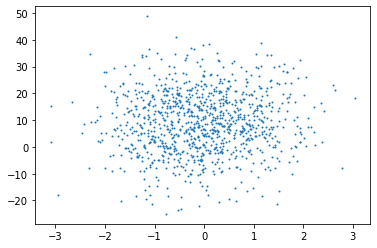

In [5]:
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

In [6]:
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices) #打乱顺序
    for j in range(0,num_examples,batch_size):
        j=torch.LongTensor(indices[j:min(j+batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)
#似乎可以用以下函数更简明的改写
#torch.randperm(n, out=None) → LongTensor
#给定参数n，返回一个从0 到n -1 的随机整数排列。

In [7]:
w=0.01*torch.randn(num_inputs,1,dtype=torch.float32)
b=0.01*torch.randn(1,dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.0067], requires_grad=True)

In [8]:
def linreg(X,w,b):
    return torch.mm(X,w)+b
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2
##上面改变形状是因为此时y是1维的，但y_hat是2维的
def sgd(params,lr,batch_size):
    for para in params:
        para.data-=lr*para.grad/batch_size

In [9]:
lr=0.05
num_epochs=5
net=linreg
loss=squared_loss
batch_size=10

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))
print(true_w, '\n', w)
print(true_b, '\n', b)

epoch 1, loss 0.009865
epoch 2, loss 0.009964
epoch 3, loss 0.009960
epoch 4, loss 0.010056
epoch 5, loss 0.009846
[12.21, 1.08] 
 tensor([[12.2173],
        [ 1.0786]], requires_grad=True)
9.27 
 tensor([9.2765], requires_grad=True)


P:\ana\lib\site-packages\torch\autograd\__init__.py:130: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(
